In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm

In [2]:
file = '../example_data/Recording Set 2024.01.29-10.41.03.CSV'

# Read experiment data
df = pd.read_csv(file, skiprows=[0,1]) # read, skip info rows


# Convert to datetime
df['Time Stamp'] = pd.to_datetime(df['Time Stamp'], format='%b-%d-%Y %H:%M:%S.%f %p')

# Inspect data
df.head()

,Time Stamp,PC Capman Pressure,PC Source 2 Freq,PC Source 2 Q,PC Source 2 Rate,PC Source 4 Freq,PC Source 4 Q,PC Source 4 Rate,PC Source 6 Freq,PC Source 6 Q,PC Source 6 Rate,Power Supply 1 Power,Power Supply 1 Voltage,Power Supply 3 Power,Power Supply 3 Voltage,Power Supply 5 DC Bias,Power Supply 5 Fwd Power,PC High Vac Valve Position,PC MFC 1 Flow
0,2024-01-29 10:41:03.350,3.091478,5.983068e+06,96.613522,0.000074,5.986804e+06,97.360817,-0.000534,5.982949e+06,96.589794,0.000371,3.664503,458.575562,14.950192,403.740784,70,35,55,52.278508
1,2024-01-29 10:41:03.458,3.076219,5.983068e+06,96.613522,0.000074,5.986804e+06,97.360817,-0.000534,5.982949e+06,96.589794,0.000371,4.645786,441.413055,4.576301,395.895203,70,35,55,51.845823
2,2024-01-29 10:41:03.568,3.076219,5.983068e+06,96.613522,0.000074,5.986804e+06,97.360817,-0.000534,5.982949e+06,96.589794,0.000371,4.645786,441.413055,4.576301,395.895203,70,35,55,51.845823
3,2024-01-29 10:41:03.677,3.060960,5.983068e+06,96.613522,0.000074,5.986804e+06,97.360817,-0.000534,5.982949e+06,96.589794,0.000371,4.645786,441.413055,4.576301,395.895203,70,35,55,51.714321
4,2024-01-29 10:41:03.785,3.060960,5.983068e+06,96.613522,0.000074,5.986804e+06,97.360817,-0.000534,5.982949e+06,96.589794,0.000371,4.645786,441.413055,4.576301,395.895203,70,35,55,51.714321


In [3]:
p1 = 'Power Supply 1 Voltage'
p2 = 'Power Supply 3 Voltage'
p3 = 'Power Supply 5 DC Bias'

ps = [p1,p2,p3]


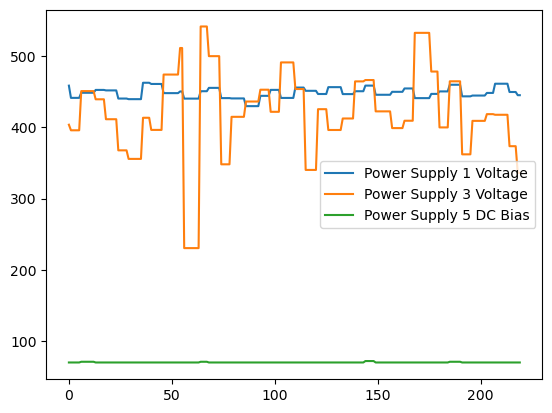

In [4]:
plotdf = df[ps]
plotdf.plot()
plt.show()

# Rolling std

Power Supply 1 Voltage
Power Supply 3 Voltage
Power Supply 5 DC Bias


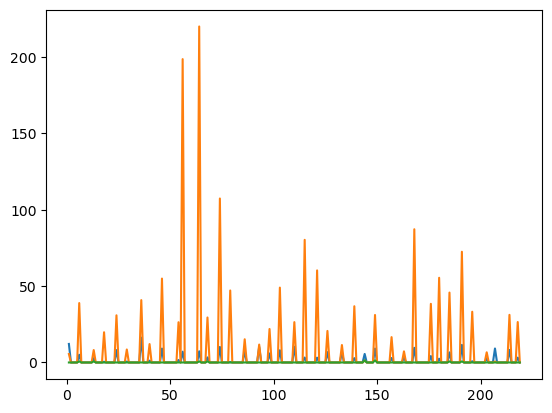

In [5]:
for p in ps:
    df[p].rolling(2).std().plot()

# Augmented Dickey-Fuller unit root test

### Doesn't seem to work, all three classified as stationary. Also, small differences in p-value.

In [8]:
for p in ps:
    
    print(p)
    
    print(adfuller(df[p]))

Power Supply 1 Voltage
(-5.241117370246814, 7.242577724925659e-06, 4, 215, {'1%': -3.461136478222043, '5%': -2.875078880098608, '10%': -2.5739861168199027}, 1142.4574124314702)
Power Supply 3 Voltage
(-3.9424808165681546, 0.0017435282955679204, 10, 209, {'1%': -3.4620315036789666, '5%': -2.8754705024827127, '10%': -2.5741950726860647}, 2039.4451956388123)
Power Supply 5 DC Bias
(-4.8340349237895515, 4.679320550324208e-05, 5, 214, {'1%': -3.4612821203214907, '5%': -2.875142613826617, '10%': -2.574020122281422}, -29.586562833422192)


# KPSS test 

### Doesn't seem to work (https://statology.org/kpss-test-in-python/).

In [6]:
for p in ps:
    
    print(p)
    
    print(sm.tsa.stattools.kpss(df[p], regression='ct'))
    

plt.show()


Power Supply 1 Voltage
(0.0733051662863167, 0.1, 8, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})
Power Supply 3 Voltage
(0.0592313460650454, 0.1, 8, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})
Power Supply 5 DC Bias
(0.05852367169249, 0.1, 8, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})


/var/folders/z7/hhdyq2c544q40kc9g6q0kqd00000gn/T/ipykernel_11942/2695750822.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print(sm.tsa.stattools.kpss(df[p], regression='ct'))
/var/folders/z7/hhdyq2c544q40kc9g6q0kqd00000gn/T/ipykernel_11942/2695750822.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print(sm.tsa.stattools.kpss(df[p], regression='ct'))
/var/folders/z7/hhdyq2c544q40kc9g6q0kqd00000gn/T/ipykernel_11942/2695750822.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print(sm.tsa.stattools.kpss(df[p], regression='ct'))


# Autocorrelation 

### Doesn't seem to work. Tried with different lags but it is hard to make a meaningful distinction

In [7]:
for p in ps:
    
    print(p)
    
    print(df[p].autocorr())


#plt.show()

Power Supply 1 Voltage
0.8390752821103445
Power Supply 3 Voltage
0.809386374224236
Power Supply 5 DC Bias
0.7921074043938146
